# CSCA 5622 Supervised Learning Final Project

For my final project in a Supervised Learning course, I am utilizing the Wine dataset, a well-known resource in data science. The primary objective of this project is to apply various classification algorithms to this dataset and exploring and getting acquainted with various Python libraries used in data analysis and machine learning. This will provide a solid foundation for handling more complex data in future projects.

In [1]:
# Importing all the required libraries

from math import exp
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline


# Dataset

1. Title of Database: Wine recognition data
2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Link: 
    https://archive.ics.uci.edu/dataset/109/wine


4. Attributes:

   -- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline            

5. Number of Instances

	class 1 59
	class 2 71
	class 3 48

6. Number of Attributes 
	
	13

7. For Each Attribute:

	All attributes are continuous
	
	No statistics available, but suggest to standardise
	variables for certain uses (e.g. for us with classifiers
	which are NOT scale invariant)

	NOTE: 1st attribute is class identifier (1-3)

8. Missing Attribute Values:

	None

9. Class Distribution: number of instances per class


   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315  Proline  
0             5.64  1.04         3.92     1065  
1             4.38  1.05         3.40     1050  
2          

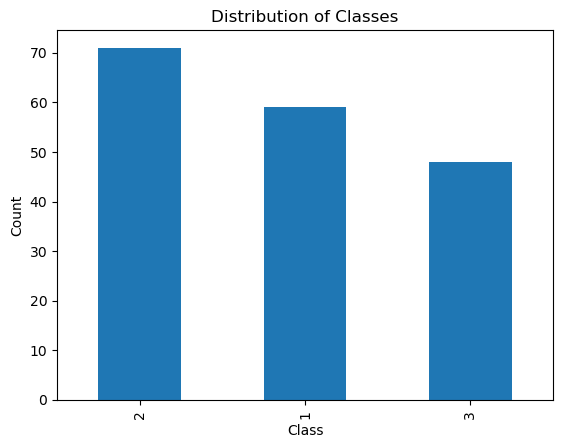

In [4]:
# Load data

filepath = '~/notebooks/CSCA-5622/final project/wine.data' # change this path for your environment
target_column = 'Class'
random_state = 123
performance=['',0] * 3

column_names = [
    'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
    'Color intensity', 'Hue', 'OD280/OD315', 'Proline'
]

df = pd.read_csv(filepath, header=None, names=column_names)

# Initial inspection
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print('Null values in each columns')
print(df.isnull().sum())

# Distribution of Classes
class_counts = df[target_column].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

Will split train and test data to an 80:20 ratio, a commonly used approach in machine learning

In [5]:

# Target column is "Class", as described when loading data
X = df.drop(target_column, axis=1)
y = df[target_column]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

print('X_train', len(X_train), "{:.1f}%".format(len(X_train)/len(df) * 100))
print('X_test', len(X_test), "{:.1f}%".format(len(X_test)/len(df) * 100))
print('y_train', len(y_train), "{:.1f}%".format(len(y_train)/len(df) * 100))
print('y_test', len(y_test), "{:.1f}%".format(len(y_test)/len(df) * 100))

# Feature scaling
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train 142 79.8%
X_test 36 20.2%
y_train 142 79.8%
y_test 36 20.2%


The division of the dataset is not precisely 80% for training and 20% for testing, due to the limited number of rows. 


Declared common functions here

In [6]:
# common functions
def print_report(test, pred, title):
    # report data
    report = classification_report(test, pred)
    print(report)
    
def performance_tuning(X_train, y_train, X_test, model, param_grid, cv=5, scoring='accuracy'):
    # Find best paramater using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    print("Best parameters: ", grid_search.best_params_)

    return grid_search.best_estimator_.predict(X_test)


I used sklearn libraries.

Initially, we will start with basic parameter settings for our models to establish a baseline performance. Subsequently, we'll employ GridSearchCV to systematically fine-tune these parameters, enhancing the models' accuracy and efficiency

### Logistic Regression

In [7]:
# LogisticRegression
model = LogisticRegression(C=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("LogisticRegression accuracy:", accuracy)

# visualize classifiction report
print_report(y_test, y_pred, 'Logistic Regression')

# find best parameters
logreg = LogisticRegression(tol=1e-3, max_iter=1000) # prevent error max_iter exceed

param_grid = [
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'solver': ['newton-cg'], 'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'solver': ['sag'], 'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

y_pred = performance_tuning(X_train, y_train, X_test, logreg, param_grid)


best_accuracy = accuracy_score(y_test, y_pred)
print("LogisticRegression (Best) accuracy:", best_accuracy)

# print classifiction report
print_report(y_test, y_pred, 'Logistic Regression (Best)')


performance[0] = ('LogisticRegression', accuracy, best_accuracy)

LogisticRegression accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       0.91      0.91      0.91        11
           3       1.00      0.94      0.97        17

    accuracy                           0.94        36
   macro avg       0.93      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

Best parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression (Best) accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.92      1.00      0.96        11
           3       1.00      0.94      0.97        17

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [ ]:
# 

In [8]:
# RandomForestClassifier
model = RandomForestClassifier(max_depth=1, n_estimators=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier accuracy:", accuracy)

default_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", default_mse)

# visualize classifiction report
print_report(y_test, y_pred, 'RandomForestClassifier (Default)')

# find best parameters
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [1, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [1, 3, 10, 30],        # Maximum depth of the tree
}

y_pred = performance_tuning(X_train, y_train, X_test, rfc, param_grid, cv=3)

best_accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier (Best) accuracy:", best_accuracy)

best_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",best_mse)

# print classifiction report
print_report(y_test, y_pred, 'RandomForestClassifier (Best)')

performance[1] = ('RandomForestClassifier', accuracy, best_accuracy)


RandomForestClassifier accuracy: 0.8611111111111112
Mean Squared Error: 0.2222222222222222
              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.73      1.00      0.85        11
           3       1.00      0.76      0.87        17

    accuracy                           0.86        36
   macro avg       0.87      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36

Best parameters:  {'max_depth': 3, 'n_estimators': 300}
RandomForestClassifier (Best) accuracy: 1.0
Mean Squared Error: 0.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [9]:
# SVM
model = SVC(C=0.1, kernel='rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("SVC (Default) accuracy:", accuracy)

# print classifiction report
print_report(y_test, y_pred, 'SVC (Default)')

svc = SVC()

param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'poly', 'sigmoid']}


# find best parameters
y_pred = performance_tuning(X_train, y_train, X_test, svc, param_grid)


best_accuracy = accuracy_score(y_test, y_pred)
print("SVC (Best) accuracy:", best_accuracy)

# print classifiction report
print_report(y_test, y_pred, 'SVC (Best)')

performance[2] = ('SVC', accuracy, best_accuracy)


SVC (Default) accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.79      1.00      0.88        11
           3       1.00      0.82      0.90        17

    accuracy                           0.92        36
   macro avg       0.93      0.94      0.93        36
weighted avg       0.93      0.92      0.92        36

Best parameters:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC (Best) accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.92      1.00      0.96        11
           3       1.00      0.94      0.97        17

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [10]:
Lets compare results.




[('LogisticRegression', 0.9444444444444444, 0.9722222222222222),
 ('RandomForestClassifier', 0.8611111111111112, 1.0),
 ('SVC', 0.9166666666666666, 0.9722222222222222),
 0,
 '',
 0]

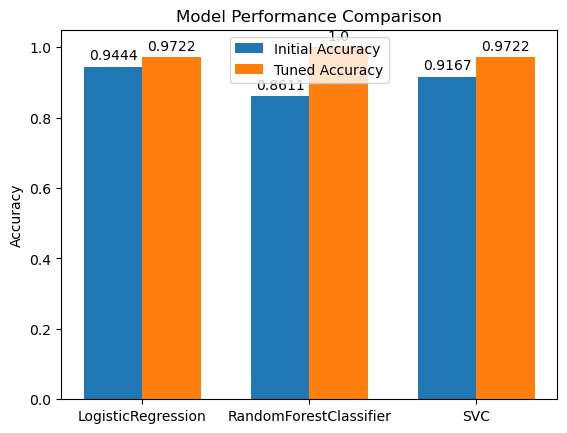

In [15]:
f_performance = pd.DataFrame(performance[:3])

# Creating the bar chart
x = range(len(performance[0]))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, df_performance[1], width, label='Initial Accuracy')
rects2 = ax.bar([p + width for p in x], df_performance[2], width, label='Tuned Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(df_performance[0])
ax.legend()

# Function to attach a label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Attaching labels
autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.show()

# Summary

In this project, I applied three classification algorithms: Logistic Regression, Random Forest Classifier, and Support Vector Classifier (SVC). After fine-tuning the parameters, both Logistic Regression and SVC yielded similar results. However, the Random Forest Classifier showed a discrepancy, as indicated by its perfect score of 1, suggesting it may not be the best fit for this particular dataset.

Through parameter tuning, I observed that model performance can be significantly enhanced. This process underscores the importance of selecting and optimizing model parameters tailored to the dataset.

# Key Takeaways

This project served as an excellent platform for gaining familiarity with various Python libraries central to machine learning, specifically in the realm of classification models. My understanding of model parameters and their impact on performance deepened considerably, especially through hands-on experiences during lab sessions. This has been a valuable step in advancing my knowledge and skills in the field of machine learning.

This experience will help managing more complex datasets and models in future projects.